In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler

Датасет с kaggle (https://www.kaggle.com/datasets/kyasar/boston-housing)

Origin: This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University.

Creator: Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.

Date: July 7, 1993

In [2]:
df = pd.read_csv('data/boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [5]:
X = df.drop(['medv'], axis = 1)
Y = df['medv']

In [6]:
X = sm.add_constant(X)
mod = sm.OLS(Y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          6.72e-135
Time:                        13:55:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Сильная мультиколлинеарность не мешает предсказательной силе модели (R-squared = 0.741), но мешает адекватно оценить вклад каждой переменной. Стандартизуем переменные, чтобы попробовать избавиться от неё.

In [14]:
X = df.drop(['medv'], axis = 1)
Xs = pd.DataFrame(StandardScaler().fit_transform(X))
Xs.columns = X.columns
Xs.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [15]:
vif_df = pd.DataFrame()
vif_df['feature'] = Xs.columns
vif_df['VIF'] = [vif(Xs.values, i) for i in range(len(Xs.columns))]

vif_df

,feature,VIF
0,crim,1.792192
1,zn,2.298758
2,indus,3.991596
3,chas,1.073995
4,nox,4.393720
5,rm,1.933744
6,age,3.100826
7,dis,3.955945
8,rad,7.484496
9,tax,9.008554


VIF = Variance Inflation Factor - показывает, насколько каждая переменная зависима от всех остальных. Используя отсечку в VIF=5, видим, что проблемы возникают с налогом и расстоянием до радиальных шоссе. Посмотрим на матрицу корреляции между стандартизованными переменными.

<Axes: >

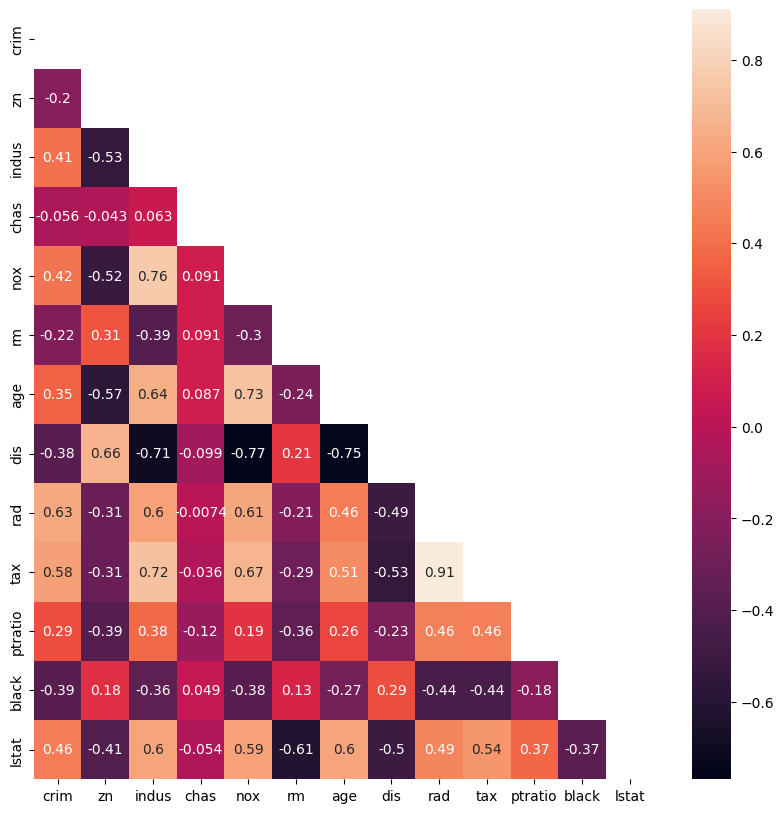

In [16]:
fig, ax = plt.subplots(figsize = (10, 10))
corr = Xs.corr()
mask = np.tril(np.ones(corr.shape), -1).astype(bool)
sns.heatmap(corr.where(mask), annot = True)

Сильная корреляция наблюдается между налогом и расстоянием до радиального шоссе. Посмотрим, что происходит при выбрасывании каждой из этих переменных по очереди.

In [17]:
X1 = sm.add_constant(Xs.drop(['tax'], axis = 1))
mod = sm.OLS(Y, X1).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.21e-133
Time:                        13:58:12   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.213    105.772      0.000      22.114      22.951
crim          -0.9172      0.285     -3.216      0.001      -1.477      -0.357
zn             0.8474      0.315      2.692      0.007       0.229       1.466
indus         -0.4645      0.383     -1.214      0.225      -1.216       0.287
chas           0.7686      0.219      3.507      0.000       0.338       1.199
nox           -2.1649      0.445     -4.862      0.000      -3.040      -1.290
rm             2.7457      0.295      9.294      0.000       2.165       3.326
age           -0.0170      0.375     -0.045      0.964      -0.754       0.720
dis           -3.1308      0.424     -7.390      0.000      -3.963      -2.298
rad            1.1706      0.359      3.262      0.001       0.466       1.876
ptratio       -2.1306      0.285     -7.478      0.000      -2.690      -1.571
black          0.8707      0.247      3.521      0.000       0.385       1.357
lstat         -3.7254      0.365    -10.198      0.000      -4.443      -3.008
==============================================================================
Omnibus:                      168.699   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.173
Skew:                           1.452   Prob(JB):                    3.35e-153
Kurtosis:                       7.987   Cond. No.                         5.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X2 = sm.add_constant(Xs.drop(['rad'], axis = 1))
mod = sm.OLS(Y, X2).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.92e-131
Time:                        13:58:12   Log-Likelihood:                -1509.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.215    104.682      0.000      22.110      22.956
crim          -0.5804      0.278     -2.090      0.037      -1.126      -0.035
zn             0.9254      0.325      2.852      0.005       0.288       1.563
indus         -0.4003      0.413     -0.969      0.333      -1.212       0.411
chas           0.7903      0.222      3.563      0.000       0.355       1.226
nox           -1.7668      0.447     -3.956      0.000      -2.644      -0.889
rm             2.8881      0.296      9.772      0.000       2.307       3.469
age           -0.1104      0.378     -0.292      0.770      -0.853       0.632
dis           -3.1347      0.428     -7.323      0.000      -3.976      -2.294
tax            0.2246      0.398      0.565      0.573      -0.557       1.006
ptratio       -1.8140      0.284     -6.398      0.000      -2.371      -1.257
black          0.7675      0.249      3.079      0.002       0.278       1.257
lstat         -3.6841      0.369     -9.986      0.000      -4.409      -2.959
==============================================================================
Omnibus:                      189.296   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.772
Skew:                           1.596   Prob(JB):                    7.58e-198
Kurtosis:                       8.733   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Предсказательная сила первой модели больше второй. Более того, p-value для налога составляет 0.573, что означает, что вероятность получить соответствующий коэффициент для него случайно больше 50% (по сравнению с p-value=0.001 для расстояния до радиальных шоссе).

В обеих моделях наибольший вклад в медианную стоимость жилья вносят доля низшего класса населения, расстояние до центра занятости и среднее количество комнат в доме. Наибольшее p-value (и наименьшую статистическую значимость) имеют доля старых зданий и доля нерозничного бизнеса в городе.